In [1]:
# HÜCRE 1: KÜTÜPHANELER
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# GPU kontrolü
import torch
print(f"CUDA (GPU) durumu: {torch.cuda.is_available()}")

CUDA (GPU) durumu: True


In [6]:
# HÜCRE 2: YOLO SINIFLANDIRMA EĞİTİMİ
# ====================================

# 1. Veri Seti Yolu (Klasör yapısı: Final_Dataset -> train -> Dolu/Boş)
# BURAYI KENDİ YOLUNLA KONTROL ET
dataset_path = r"C:\Users\edize\Final_Dataset"

# 2. Modeli Başlat (Sınıflandırma için '-cls' uzantılı model daha iyidir)
# Eğer yolo11n-cls.pt yoksa otomatik indirir.
model = YOLO('yolo11n-cls.pt') 

# 3. Eğitimi Başlat
print("Eğitim başlıyor...")
results = model.train(
    data=dataset_path, 
    epochs=5,           # Deneme için 5, proje için 10-20 yapabilirsin
    imgsz=224,          # Resim boyutu
    batch=32,           
    name='DeepPark_Yolo_Egitim', # Sonuçların kaydedileceği klasör adı
    device=0            # 0 = GPU, 'cpu' = İşlemci
)

print("✅ Eğitim tamamlandı!")

Eğitim başlıyor...
Ultralytics 8.3.248  Python-3.12.7 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\edize\Final_Dataset, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=DeepPark_Yolo_Egitim, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mas

In [7]:
# HÜCRE 3: TEST VE DOĞRULAMA (VALIDATION)
# =======================================

# Eğittiğimiz en iyi modeli yükleyelim (runs klasöründe oluştu)
# Genelde yol şöyledir: runs/classify/DeepPark_Yolo_Egitim/weights/best.pt
# Otomatik bulamazsan elle yolunu yazman gerekebilir.
best_model_path = f"runs/classify/DeepPark_Yolo_Egitim/weights/best.pt"

try:
    model = YOLO(best_model_path)
    print(f"Yüklenen Model: {best_model_path}")
except:
    print("Model yolu bulunamadı, lütfen 'runs' klasörüne bakıp yolu düzelt.")
    # Eğer hata alırsan buraya tam yolu elle yaz:
    # model = YOLO(r"C:\Users\...\runs\classify\DeepPark_Yolo_Egitim\weights\best.pt")

# Test verisi üzerinde doğrulama yap
# split='test' diyerek test klasörünü kullanmasını söylüyoruz
metrics = model.val(data=dataset_path, split='test')

print("\n" + "="*30)
print("🏆 YOLO MODEL SONUÇLARI")
print("="*30)
print(f"Top-1 Accuracy (Doğruluk): %{metrics.top1 * 100:.2f}")
print(f"Top-5 Accuracy: %{metrics.top5 * 100:.2f}")

Yüklenen Model: runs/classify/DeepPark_Yolo_Egitim/weights/best.pt
Ultralytics 8.3.248  Python-3.12.7 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
YOLO11n-cls summary (fused): 47 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
train: C:\Users\edize\Final_Dataset\train... found 25861 images in 2 classes  
val: None...
test: C:\Users\edize\Final_Dataset\test... found 6466 images in 2 classes  
test: Fast image access  (ping: 0.00.0 ms, read: 26.49.7 MB/s, size: 1.4 KB)
test: Scanning C:\Users\edize\Final_Dataset\test... 6466 images, 0 corrupt: 100% ━━━━━━━━━━━━ 6466/6466  0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 405/405 89.1it/s 4.5s<0.1s
                   all      0.999          1
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to C:\Users\edize\OneDrive\Desktop\YUNUS_EMRE_EDZER_23040301042_DEEPPARK\runs\classify\val

🏆 YOLO MODEL SONUÇLARI
Top-1 Accuracy (Doğruluk): %99.94
Top-5

✅ Grafik başarıyla kaydedildi! Sol taraftaki dosya listesinde 'yolo_egitim_grafigi.png' dosyasını görebilirsin.


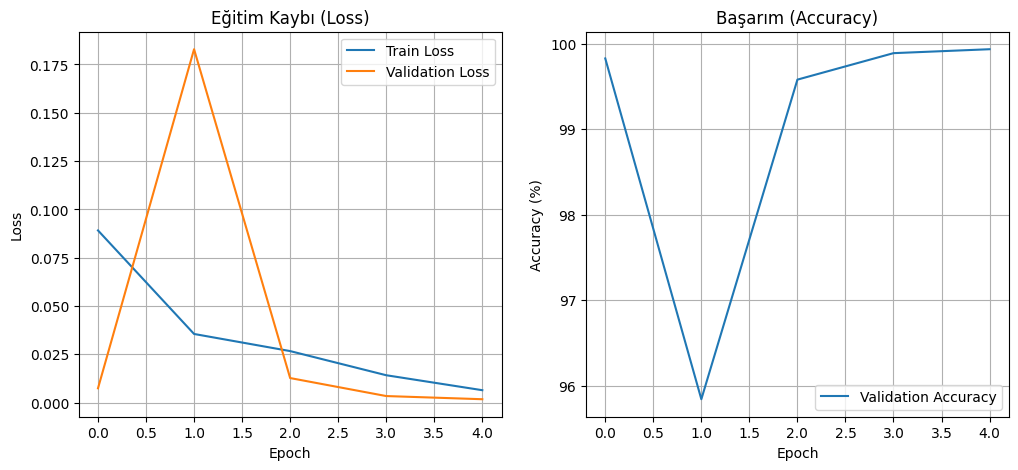

In [1]:
# HÜCRE 4: EĞİTİM GRAFİKLERİ (Düzeltilmiş - Kaydetme Özellikli)
# ==========================
import pandas as pd
import matplotlib.pyplot as plt

# Eğitim sonuçlarının olduğu CSV dosyasını bul
# Klasör adın neyse onu kullandık (DeepPark_Yolo_Egitim)
results_path = f"runs/classify/DeepPark_Yolo_Egitim/results.csv"

try:
    # CSV dosyasını oku
    data = pd.read_csv(results_path)
    
    # Sütun isimlerindeki boşlukları temizle
    data.columns = [c.strip() for c in data.columns]

    plt.figure(figsize=(12, 5))

    # Loss Grafiği
    plt.subplot(1, 2, 1)
    plt.plot(data['train/loss'], label='Train Loss')
    plt.plot(data['val/loss'], label='Validation Loss')
    plt.title('Eğitim Kaybı (Loss)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy Grafiği
    # Sütun adını kontrol et
    acc_col = 'metrics/accuracy_top1' if 'metrics/accuracy_top1' in data.columns else 'val/top1'
    
    plt.subplot(1, 2, 2)
    plt.plot(data[acc_col] * 100, label='Validation Accuracy')
    plt.title('Başarım (Accuracy)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    # ÖNEMLİ: GRAFİĞİ DOSYA OLARAK KAYDET
    plt.savefig('yolo_egitim_grafigi.png')
    print("✅ Grafik başarıyla kaydedildi! Sol taraftaki dosya listesinde 'yolo_egitim_grafigi.png' dosyasını görebilirsin.")
    
    plt.show()

except FileNotFoundError:
    print("❌ results.csv dosyası bulunamadı. Eğitim klasörünü kontrol et.")

✅ Eğitilen model başarıyla yüklendi: runs/classify/DeepPark_Yolo_Egitim/weights/best.pt

image 1/1 C:\Users\edize\Final_Dataset\test\empty\2012-09-11_17_31_01#098.jpg: 224x224 empty 1.00, occupied 0.00, 7.6ms
Speed: 5.2ms preprocess, 7.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 C:\Users\edize\Final_Dataset\test\occupied\2012-09-12_10_32_11#059.jpg: 224x224 occupied 1.00, empty 0.00, 6.4ms
Speed: 1.9ms preprocess, 6.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 C:\Users\edize\Final_Dataset\test\occupied\2013-03-12_13_35_08#038.jpg: 224x224 occupied 1.00, empty 0.00, 6.2ms
Speed: 1.8ms preprocess, 6.2ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 C:\Users\edize\Final_Dataset\test\occupied\2013-03-12_17_50_13#023.jpg: 224x224 occupied 1.00, empty 0.00, 6.2ms
Speed: 1.7ms preprocess, 6.2ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
✅ 'tahmin_ornekleri.png' başarıyla 

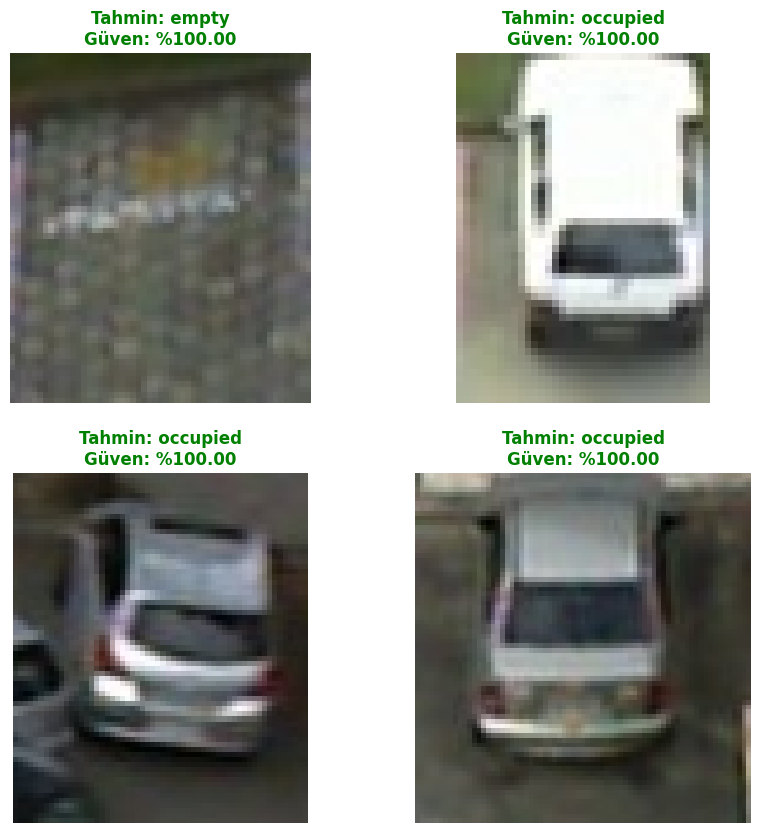

In [5]:
# HÜCRE 5: ÖRNEK TAHMİNLER (Düzeltilmiş - Doğru Model Yolu)
# =========================================================
from ultralytics import YOLO
import glob
import random
import os
import matplotlib.pyplot as plt
from PIL import Image

# 1. DOĞRU MODELİ YÜKLE (Kritik Kısım Burası)
# Eğittiğin model 'runs/classify/DeepPark_Yolo_Egitim/weights/best.pt' yolunda olmalı.
# Eğer bulamazsa 'yolo11n-cls.pt' (sınıflandırma) modelini dener.

model_path = f"runs/classify/DeepPark_Yolo_Egitim/weights/best.pt"

try:
    model = YOLO(model_path)
    print(f"✅ Eğitilen model başarıyla yüklendi: {model_path}")
except:
    print(f"⚠️ Kendi eğittiğin model ({model_path}) bulunamadı.")
    print("⚠️ Genel sınıflandırma modeli (yolo11n-cls.pt) kullanılıyor...")
    model = YOLO('yolo11n-cls.pt') # DİKKAT: -cls uzantısı şart!

# 2. Test Resimlerini Bul
dataset_path = r"C:\Users\edize\Final_Dataset" 
test_images = glob.glob(os.path.join(dataset_path, "test", "*", "*.jpg"))

if len(test_images) > 0:
    # Rastgele 4 resim seç
    random_images = random.sample(test_images, 4)
    
    # 2x2'lik bir tablo oluştur
    plt.figure(figsize=(10, 10))
    
    for i, img_path in enumerate(random_images):
        # Tahmin yap
        results = model(img_path)
        
        # Sonucu al
        result = results[0]
        
        # Hata Kontrolü: Eğer model sınıflandırma yapmadıysa uyar
        if result.probs is None:
            print("HATA: Yüklenen model bir sınıflandırma modeli değil!")
            break
            
        class_id = result.probs.top1
        class_name = result.names[class_id]
        confidence = result.probs.top1conf.item()
        
        # Resmi göster
        plt.subplot(2, 2, i + 1)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
        
        # Başlığa tahmini yaz
        plt.title(f"Tahmin: {class_name}\nGüven: %{confidence*100:.2f}", color='green', fontsize=12, fontweight='bold')

    # Resmi bilgisayara kaydet
    plt.savefig('tahmin_ornekleri.png')
    print("✅ 'tahmin_ornekleri.png' başarıyla kaydedildi! Sol panelden dosyayı bulabilirsin.")
    plt.show()

else:
    print("❌ Test klasöründe resim bulunamadı. Lütfen 'dataset_path' yolunu kontrol et.")